In [8]:
from scipy.io.wavfile import read as wavread
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

Samplerate: 8000


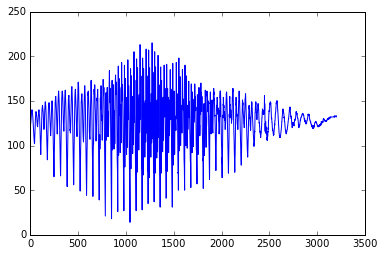

In [23]:
filename = 'Sounds/0/01.wav'
#Частота дискретизации и зависимость сигнала от времени
[samplerate, x] = wavread(filename)
print('Samplerate: {}'.format(samplerate))
plt.plot(x)

In [24]:
from numpy.fft import rfft
#Дискретное преобразование Фурье
xfft = rfft(x, 256)
xfft

array([  3.20340000e+04 +0.00000000e+00j,
        -4.67811188e+02 +7.99741643e+01j,
        -2.72074984e+02 -1.10541152e+02j,
        -5.15840845e+02 +2.00166094e+02j,
        -1.59163518e+02 -1.54207020e+03j,
        -3.86356437e+02 -4.97494619e+02j,
        -6.45149633e+02 -4.59557893e+02j,
        -1.24933802e+03 -1.36894250e+03j,
         1.49358140e+03 -9.00627137e+01j,
         3.20772711e+02 -1.75640226e+02j,
         1.88623394e+02 -4.95737956e+01j,
         1.97387573e+02 -1.69534252e+02j,
         1.28855580e+02 +9.00532925e+01j,
         1.56059704e+02 +5.52716637e+01j,
         1.39004463e+02 -9.74459729e+01j,
         3.64956004e+02 +1.45214297e+02j,
         3.47866084e+01 +3.02190897e+01j,
         4.53036946e+01 +7.82112859e+01j,
         5.64466215e+01 +4.62731034e+01j,
         6.46632802e+01 +8.66857113e+01j,
         4.13739715e+01 +4.97402076e+01j,
         4.36528515e+01 +1.43673700e+01j,
         3.56559209e+01 +8.06226551e+01j,
        -1.06255426e+01 +7.3738309

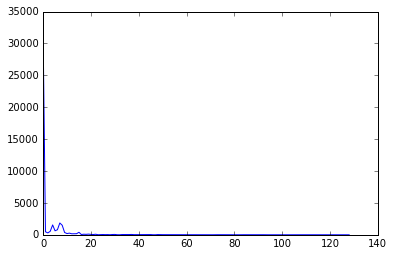

In [25]:
#Амплитуда результирующего сигнала
xfft_p = np.abs(xfft)
xfft_p
plt.plot(xfft_p)

In [26]:
#в логарифмическо масштабе
plt.plot(np.log(xfft_p))

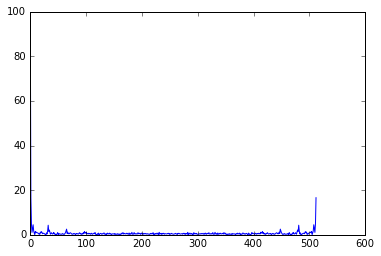

In [35]:
from numpy.fft import ifft
xfft_db = 10*np.log(np.abs(rfft(x, 1024))**2)
plt.plot(np.abs(ifft(xfft_db)))

In [64]:
def calc_cepstr(filename):
    [samplerate, x] = wavread(filename)
    return(np.abs(ifft(10*np.log(np.abs(rfft(x, 1024))**2)))[:32])

In [65]:
from os import listdir
from os.path import isfile, join
numbers = [f for f in listdir('Sounds') if not isfile(join('Sounds', f))]
print(numbers)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [72]:
X = []
y = []

for n in numbers:
    files = [f for f in listdir(join('Sounds', n)) if isfile(join('Sounds', n, f)) and f.endswith('wav')] 
    for f in files:
        fn = join('Sounds', n, f)
        # print(fn)
        x = calc_cepstr(fn)
        if np.isfinite(x).all():
            X.append(x)
            y.append(n)
        
X = np.array(X)
y = np.array(y)
print(X.shape)
print(y.shape)

C:\Anaconda3\lib\site-packages\scipy\io\wavfile.py:221: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
C:\Anaconda3\lib\site-packages\numpy\fft\fftpack.py:284: RuntimeWarning: invalid value encountered in multiply
  return output * (1 / (sqrt(n) if unitary else n))


(991, 32)
(991,)


In [74]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

693 298


In [75]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.130872483221
